## Import libraries.

Import all the necessary libraries.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Define constants.

In [4]:
# Constants for directions and colors
UP = (0, 1)
DOWN = (0, -1)
LEFT = (-1, 0)
RIGHT = (1, 0)
OUR_COLOR = "O"
OTHER_COLOR = "X"
TARGET=200

## Define all the functions.

Here we define:
- **grow_from_node** function: it choose a direction of growth randomly. If the node in that direction is blank, then it does the colour assignment. If the colour assignment is red, then we append the new node to the seed cluster. 
        
- **model_growth** function: it use grow_from_node while the size of the cluster is smaller than the target size OR there are no more blank spot to grow.
        
- **plot_grid** function: this funcion simply plot in a fancy way the cluster with target size.    

In [7]:
def grow_from_node(node, grid, cluster):
    available_directions = [UP, DOWN, LEFT, RIGHT]
    random.shuffle(available_directions)  # To randomize the choice

    for direction in available_directions:
        next_node = (node[0] + direction[0], node[1] + direction[1])

        # Check if the cell is blank
        if next_node not in grid:
            # Color assignment
            if random.random() < 0.5:
                grid[next_node] = OUR_COLOR
                cluster.append(next_node)
            else:
                grid[next_node] = OTHER_COLOR
            return True

    return False

def model_growth(target_size):
    grid = {(0,0): OUR_COLOR}
    cluster = [(0, 0)]

    while len(cluster) < target_size:
        random.shuffle(cluster)  # Randomize the order of nodes
        success = False

        for node in cluster:
            if grow_from_node(node, grid, cluster):
                if len(cluster) >= target_size:
                    return grid, cluster
                success = True
                break

        if not success:
            return None, None

def plot_grid(grid):
    min_x = min([key[0] for key in grid])
    max_x = max([key[0] for key in grid])
    min_y = min([key[1] for key in grid])
    max_y = max([key[1] for key in grid])

    # Initialize a matrix with white values
    matrix = np.ones((max_y-min_y+1, max_x-min_x+1, 3))

    # Fill the matrix based on grid values
    for (x, y), value in grid.items():
        if value == OUR_COLOR:
            matrix[max_y-y, x-min_x] = [0.8156862745098039, 0.13725490196078433, 0.27450980392156865]  # Fancy red for our cluster nodes
        elif value == OTHER_COLOR:
            matrix[max_y-y, x-min_x] =  [0.9, 0.9, 0.9] # Light grey for other color

    # Plot the matrix
    plt.imshow(matrix)
    plt.axis('off')
    plt.show()



## Run the model.

In this code cell we actually run the model to generate our RGM cluster with target size. 
The code continue to run until a cluster with desired size is generated, then print both 
the cluster and the number of failures before getting to the right size.

Cluster of size 200 found after 11 simulations of the model!


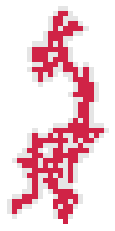

In [18]:
failed_times=0
while True:
    grid, cluster = model_growth(TARGET)
    if grid:  # If we obtained a grid, that means we got a cluster of required size.
        print("Cluster of size", len(cluster), "found after", failed_times, "simulations of the model!")
        plot_grid(grid)
        break
    else:
        failed_times += 1